In [15]:
import random
import numpy as np
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


## L63 System - Ensemble

In [2]:
%%cython 
def L63(t, u, r=13.926, Pr=10., b=8/3):
    u_1 = u[0]
    u_2 = u[1]
    u_3 = u[2]
    
    f_1 = Pr * (u_2 - u_1)
    f_2 = -u_1 * u_3 + r * u_1 - u_2
    f_3 = u_1 * u_2 - b * u_3
    
    return [f_1, f_2, f_3]

In [3]:
def solve_L63(r=13.926, Pr=10., b=8/3, u0=[1,0,0], t_stop=100, t_steps=100_000):
    t_range = np.linspace(0, t_stop, t_steps)
    solution = solve_ivp(lambda t, u: L63(t, u, r, Pr, b), t_span=(0, t_stop), y0=u0, t_eval=t_range)   
    return solution

In [66]:
def sphere_ensemble(R, N=1000, u0=[1,0,0]):
    out = []
    for i in range(N):
        l = random.uniform(0, 1)
        v = random.uniform(-1, 1)
        phi = random.uniform(0, 2 * np.pi)
        
        d = [R * l**(1/3) * np.sqrt(1-v**2) * np.cos(phi),
             R * l**(1/3) * np.sqrt(1-v**2) * np.sin(phi),
             R * l**(1/3) * v]
        
        u = [sum(x) for x in zip(u0, d)]
                
        out.append(u)
    return out

def disk_ensemble(R, N=1000, u0=[1,0,0]):
    out = []
    for i in range(N):
        r = random.uniform(0, R)
        theta = random.uniform(0, 2 * np.pi)
        
        x = np.sqrt(r) * np.cos(theta)
        y = np.sqrt(r) * np.sin(theta)
        
        u = [sum(X) for X in zip(u0, [x, y, u0[0]])]
                
        out.append(u)
    return out

def ring_ensemble(R, N=1000, u0=[1,0,0]):
    out = []
    for i in range(N):
        phi = random.uniform(0, 2 * np.pi)

        x = R * np.cos(phi)
        y = R * np.sin(phi)
        z = R
        
        u = [sum(a) for a in zip(u0, [x, y, z])]
                
        out.append(u)
    return out 

In [11]:
def solve_L63_ensemble(r=13.926, Pr=10., b=8/3, t_stop=100, t_steps=100_000, u0s=[[1,0,0]]):
    t_range = np.linspace(0, t_stop, t_steps)
    solutions = {}
    for u0 in u0s:
        solution = solve_ivp(lambda t, u: L63(t, u, r, Pr, b), t_span=(0, t_stop), y0=u0, t_eval=t_range)
        solutions[str(u0)] = solution
    return solutions

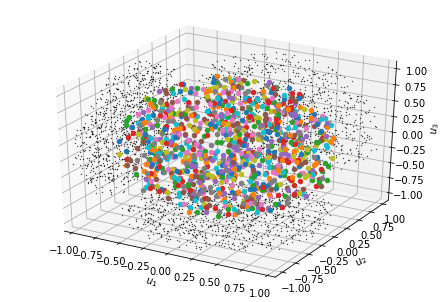

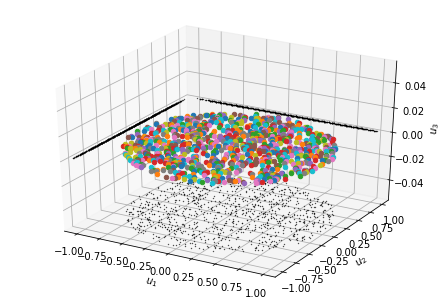

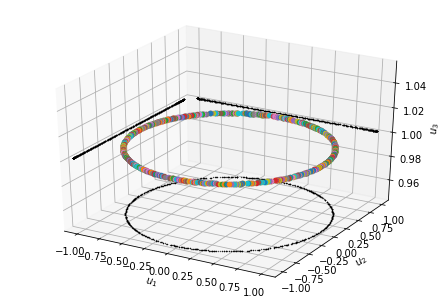

In [81]:
ens_1 = sphere_ensemble(1, 1000, [0,0,0])
ens_2 = disk_ensemble(1, 1000, [0,0,0])
ens_3 = ring_ensemble(1, 1000, [0,0,0])

ens_i = [ens_1, ens_2, ens_3]

for i, ens in enumerate(ens_i):
    fig = plt.figure()
    ax = Axes3D(fig)
    for x in ens:
        ax.scatter(x[0], x[1], x[2])

    x_lim, y_lim, z_lim = ax.get_xlim(), ax.get_ylim(), ax.get_zlim()

    for x in ens:

        ax.scatter(x[0], x[2], zdir='y', zs=y_lim[1], s=.1, c='k', zorder=1)
        ax.scatter(x[1], x[2], zdir='x', zs=x_lim[0], s=.1, c='k', zorder=1)
        ax.scatter(x[0], x[1], zdir='z', zs=z_lim[0], s=.1, c='k', zorder=1)

    ax.set_xlabel(r'$u_1$')
    ax.set_ylabel(r'$u_2$')
    ax.set_zlabel(r'$u_3$')

    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)
    plt.show()

### a)

In [ ]:
ens_1 = sphere_ensemble(1, 1000, [0,0,0])
sols = solve_L63_ensemble(r=13.926, Pr=10., b=8/3, t_stop=100, t_steps=100_000, u0s=ens_1)

In [ ]:
fig = plt.figure()
axs = []

for i, j in indices:
    axs.append(plt.subplot2grid((1, len(indices)), (0, i)))
    
    for sol in sols:
    
        axs[i].scatter(sol.y[i][::10_000], sol.y[j][::10_000], s=.1, c=cmap)

        axs[i].set_xlabel(r'$u_{}$'.format(i+1))
        axs[i].set_ylabel(r'$u_{}$'.format(j+1))
    
fig.set_size_inches(12, 4)
plt.tight_layout()
plt.show()